 ### Imports


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
from IPython.display import display, HTML
# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery
import pandas.util.testing as tm
# For exporting any dataframe in csv
from google.colab import files



## Covid Race data https://covidtracking.com/race 

In [0]:


url = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/Race%20Data%20-%20Tracker%20Commits.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Positives,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Deaths,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Negatives,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,NaN
1,NaN,NaN,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,NaN
2,20200510.0,AK,NaN,NaN,5/09 0:00,5/10 22:15,SAR,AFG,379,238,9,NaN,45,24,13,12,10,28,7%,35,305,39,10%,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,10,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200510.0,AL,NaN,NaN,5/10 0:00,5/10 22:24,SAR,AFG,9889,4333,3789,NaN,61,NaN,NaN,NaN,371,1334,13%,759,7266,1864,19%,393,194,178,NaN,3,NaN,NaN,NaN,5,9,2%,9,341,42,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200510.0,AR,NaN,NaN,5/10 19:05,5/10 22:36,SAR,AFG,4012,1922,1322,NaN,44,9,53,19,152,300,8%,191,3747,74,2%,82,45,30,NaN,NaN,NaN,0,NaN,4,3,4%,NaN,NaN,82,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Stats America DataSet


In [0]:
url_cali = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_california.xls'
url_illinois = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_illinois.xls'
url_massachusetts = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_massachusetts.xls'
url_new_jersey = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_jersey.xls'
url_new_york ='https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_york.xls'

#### California

In [0]:
data = pd.read_html(url_cali)
data[0]


,Unnamed: 0,"Alameda County, CA","Alpine County, CA","Amador County, CA","Butte County, CA","Calaveras County, CA","Colusa County, CA","Contra Costa County, CA","Del Norte County, CA","El Dorado County, CA","Fresno County, CA","Glenn County, CA","Humboldt County, CA","Imperial County, CA","Inyo County, CA","Kern County, CA","Kings County, CA","Lake County, CA","Lassen County, CA","Los Angeles County, CA","Madera County, CA","Marin County, CA","Mariposa County, CA","Mendocino County, CA","Merced County, CA","Modoc County, CA","Mono County, CA","Monterey County, CA","Napa County, CA","Nevada County, CA","Orange County, CA","Placer County, CA","Plumas County, CA","Riverside County, CA","Sacramento County, CA","San Benito County, CA","San Bernardino County, CA","San Diego County, CA","San Francisco County, CA","San Joaquin County, CA","San Luis Obispo County, CA","San Mateo County, CA","Santa Barbara County, CA","Santa Clara County, CA","Santa Cruz County, CA","Shasta County, CA","Sierra County, CA","Siskiyou County, CA","Solano County, CA","Sonoma County, CA","Stanislaus County, CA","Sutter County, CA","Tehama County, CA","Trinity County, CA","Tulare County, CA","Tuolumne County, CA","Ventura County, CA","Yolo County, CA","Yuba County, CA"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,1671329,1129,39752,219186,45905,21547,1153526,27812,192843,999101,28393,135558,181215,18039,900202,152940,64386,30573,10039107,157327,258826,17203,86749,277680,8841,14444,434061,137744,99755,3175692,398329,18807,2470546,1552058,62808,2180085,3338330,881549,762148,283111,766573,446499,1927852,273213,180080,3005,43539,447643,494336,550660,96971,65084,12285,466195,54478,846006,220500,78668
2,Population Growth or Decline 2010 to 2019,10.7 %,-3.9 %,4.4 %,-0.4 %,0.7 %,0.6 %,10.0 %,-2.8 %,6.5 %,7.4 %,1.0 %,0.7 %,3.8 %,-2.7 %,7.2 %,0.0 %,-0.4 %,-12.4 %,2.2 %,4.3 %,2.5 %,-5.7 %,-1.2 %,8.6 %,-8.7 %,1.7 %,4.6 %,0.9 %,1.0 %,5.5 %,14.3 %,-6.0 %,12.8 %,9.4 %,13.6 %,7.1 %,7.9 %,9.5 %,11.2 %,5.0 %,6.7 %,5.3 %,8.2 %,4.1 %,1.6 %,-7.3 %,-3.0 %,8.3 %,2.2 %,7.0 %,2.4 %,2.6 %,-10.9 %,5.4 %,-1.6 %,2.8 %,9.8 %,9.0 %
3,Households 2018,572870,299,14090,86797,17417,7113,392277,9799,69172,304624,10017,54267,44057,8083,267913,42735,25966,9493,3306109,44759,105258,7700,34090,79606,3660,4847,126052,49032,40904,1032373,140661,8047,718349,536029,17740,630633,1118980,359673,226727,105317,261969,144962,635525,95756,70473,1241,19257,149067,189339,172682,32360,24025,5796,136106,22427,271226,73510,26179
4,Labor Force (persons) 2019,844346,551,14900,99242,21428,10993,561757,9674,92022,450760,12997,62507,71411,8760,390999,57788,29158,9869,5121584,61945,139979,7612,38934,116226,3171,8508,222516,74004,48639,1623421,187932,7903,1104035,712394,31432,967719,1590591,583186,327077,140931,460044,217882,1053723,142277,74353,1326,17227,209527,259394,243454,45785,25650,4693,203980,21317,423390,108658,29997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),203838,225,8461,33611,9557,3225,136610,6131,28621,136851,5058,21615,26758,3883,147239,23540,13951,7444,1416482,24249,20858,3622,15925,40839,2185,2290,56133,17644,13945,368858,48289,3638,411949,225825,9440,352296,409272,84630,129211,37163,82174,49059,191695,28222,31314,620,8118,69822,67183,97071,14879,13319,3325,69974,1

#### Illinois


In [0]:
data1 = pd.read_html(url_illinois)
data1[0]

,Unnamed: 0,"Adams County, IL","Alexander County, IL","Bond County, IL","Boone County, IL","Brown County, IL","Bureau County, IL","Calhoun County, IL","Carroll County, IL","Cass County, IL","Champaign County, IL","Christian County, IL","Clark County, IL","Clay County, IL","Clinton County, IL","Coles County, IL","Cook County, IL","Crawford County, IL","Cumberland County, IL","DeKalb County, IL","De Witt County, IL","Douglas County, IL","DuPage County, IL","Edgar County, IL","Edwards County, IL","Effingham County, IL","Fayette County, IL","Ford County, IL","Franklin County, IL","Fulton County, IL","Gallatin County, IL","Greene County, IL","Grundy County, IL","Hamilton County, IL","Hancock County, IL","Hardin County, IL","Henderson County, IL","Henry County, IL","Iroquois County, IL","Jackson County, IL",...,"Mason County, IL","Massac County, IL","Menard County, IL","Mercer County, IL","Monroe County, IL","Montgomery County, IL","Morgan County, IL","Moultrie County, IL","Ogle County, IL","Peoria County, IL","Perry County, IL","Piatt County, IL","Pike County, IL","Pope County, IL","Pulaski County, IL","Putnam County, IL","Randolph County, IL","Richland County, IL","Rock Island County, IL","St. Clair County, IL","Saline County, IL","Sangamon County, IL","Schuyler County, IL","Scott County, IL","Shelby County, IL","Stark County, IL","Stephenson County, IL","Tazewell County, IL","Union County, IL","Vermilion County, IL","Wabash County, IL","Warren County, IL","Washington County, IL","Wayne County, IL","White County, IL","Whiteside County, IL","Will County, IL","Williamson County, IL","Winnebago County, IL","Woodford County, IL"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,...,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,65435,5761,16426,53544,6578,32628,4739,14305,12147,209689,32304,15441,13184,37562,50621,5150233,18667,10766,104897,15638,19465,922921,17161,6395,34008,21336,12961,38469,34340,4828,12969,51054,8116,17708,3821,6646,48913,27114,56750,...,13359,13772,12196,15437,34637,28414,33658,14501,50643,179179,20916,16344,15561,4177,5335,5739,31782,15513,141879,259686,23491,194672,6768,4951,21634,5342,44498,131803,16653,75758,11520,16844,13887,16215,13537,55175,690743,66597,282572,38459
2,Population Growth or Decline 2010 to 2019,-2.5 %,-30.1 %,-7.6 %,-1.1 %,-5.2 %,-6.7 %,-6.9 %,-7.0 %,-11.0 %,4.3 %,-7.2 %,-5.5 %,-4.6 %,-0.5 %,-6.0 %,-0.9 %,-5.8 %,-2.6 %,-0.3 %,-5.6 %,-2.6 %,0.7 %,-7.6 %,-4.9 %,-0.7 %,-3.6 %,-8.0 %,-2.8 %,-7.4 %,-13.6 %,-6.6 %,2.0 %,-4.0 %,-7.3 %,-11.6 %,-9.3 %,-3.1 %,-8.8 %,-5.8 %,...,-8.9 %,-10.7 %,-4.0 %,-6.1 %,5.1 %,-5.6 %,-5.3 %,-2.3 %,-5.3 %,-3.9 %,-6.4 %,-2.3 %,-5.3 %,-6.6 %,-13.4 %,-4.4 %,-5.1 %,-4.4 %,-3.8 %,-3.8 %,-5.7 %,-1.4 %,-10.3 %,-7.5 %,-3.3 %,-10.9 %,-6.7 %,-2.7 %,-6.5 %,-7.2 %,-3.6 %,-4.9 %,-5.6 %,-3.3 %,-7.7 %,-5.7 %,1.9 %,0.4 %,-4.3 %,-0.5 %
3,Households 2018,27300,2323,6218,18731,2087,13805,1805,6476,5024,82499,13939,6774,5638,14190,21139,1963070,7653,4322,37703,6663,7618,341823,7590,2776,13555,7616,5779,16135,14090,2314,5005,19398,3376,7420,1438,2990,20023,11779,23728,...,6027,6011,5198,6624,13349,11339,13864,5910,20901,73629,8323,6700,6527,1644,2173,2395,11873,6482,60294,103063,10002,83661,2836,1959,9203,2294,19609,54613,6669,31180,4896,6690,5975,7075,6082,23346,227848,27089,114608,14566
4,Labor Force (persons) 2019,32358,2050,7833,26377,2993,17392,23

#### Massachusetts

In [0]:
data2 = pd.read_html(url_massachusetts)
data2[0]

,Unnamed: 0,"Barnstable County, MA","Berkshire County, MA","Bristol County, MA","Dukes County, MA","Essex County, MA","Franklin County, MA","Hampden County, MA","Hampshire County, MA","Middlesex County, MA","Nantucket County, MA","Norfolk County, MA","Plymouth County, MA","Suffolk County, MA","Worcester County, MA"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,212990,124944,565217,17332,789034,70180,466372,160830,1611699,11399,706775,521202,803907,830622
2,Population Growth or Decline 2010 to 2019,-1.3 %,-4.8 %,3.1 %,4.8 %,6.2 %,-1.7 %,0.6 %,1.7 %,7.2 %,12.1 %,5.4 %,5.3 %,11.3 %,4.0 %
3,Households 2018,94292,55167,216618,6367,292659,30328,179043,58665,600032,3722,263551,186306,307870,307294
4,Labor Force (persons) 2019,115437,65320,304217,9650,429871,41318,230190,90937,929265,7661,395483,286588,461168,450332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),40194,27750,116818,3091,135741,14911,93236,23457,218287,1476,95171,99134,122750,158830
125,"Some College, No Degree",31666,16848,70051,2606,89103,9228,60147,14724,139357,1494,68162,65420,74331,97647
126,Associate Degree,15233,9043,35390,838,44103,5615,30507,9427,65854,527,36608,35254,25766,50938
127,Bachelor's Degree,40509,17408,69303,3185,126601,10480,51742,22816,303611,2381,139580,81944,135277,124040


#### New York

In [0]:
data2 = pd.read_html(url_new_york)
data2[0]

,Unnamed: 0,"Albany County, NY","Allegany County, NY","Bronx County, NY","Broome County, NY","Cattaraugus County, NY","Cayuga County, NY","Chautauqua County, NY","Chemung County, NY","Chenango County, NY","Clinton County, NY","Columbia County, NY","Cortland County, NY","Delaware County, NY","Dutchess County, NY","Erie County, NY","Essex County, NY","Franklin County, NY","Fulton County, NY","Genesee County, NY","Greene County, NY","Hamilton County, NY","Herkimer County, NY","Jefferson County, NY","Kings County, NY","Lewis County, NY","Livingston County, NY","Madison County, NY","Monroe County, NY","Montgomery County, NY","Nassau County, NY","New York County, NY","Niagara County, NY","Oneida County, NY","Onondaga County, NY","Ontario County, NY","Orange County, NY","Orleans County, NY","Oswego County, NY","Otsego County, NY","Putnam County, NY","Queens County, NY","Rensselaer County, NY","Richmond County, NY","Rockland County, NY","St. Lawrence County, NY","Saratoga County, NY","Schenectady County, NY","Schoharie County, NY","Schuyler County, NY","Seneca County, NY","Steuben County, NY","Suffolk County, NY","Sullivan County, NY","Tioga County, NY","Tompkins County, NY","Ulster County, NY","Warren County, NY","Washington County, NY","Wayne County, NY","Westchester County, NY","Wyoming County, NY","Yates County, NY"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,305506,46091,1418207,190488,76117,76576,126903,83456,47207,80485,59461,47581,44135,294218,918702,36885,50022,53383,57280,47188,4416,61319,109834,2559903,26296,62914,70941,741770,49221,1356924,1628706,209281,228671,460528,109777,384940,40352,117124,59493,98320,2253858,158714,476143,325789,107740,229863,155299,30999,17807,34016,95379,1476601,75432,48203,102180,177573,63944,61204,89918,967506,39859,24913
2,Population Growth or Decline 2010 to 2019,0.4 %,-5.8 %,2.4 %,-5.0 %,-5.2 %,-4.3 %,-5.9 %,-6.0 %,-6.5 %,-2.0 %,-5.8 %,-3.6 %,-8.0 %,-1.1 %,0.0 %,-6.3 %,-3.1 %,-3.9 %,-4.7 %,-4.1 %,-8.7 %,-5.0 %,-5.5 %,2.2 %,-2.9 %,-3.8 %,-3.4 %,-0.3 %,-2.0 %,1.3 %,2.7 %,-3.3 %,-2.6 %,-1.4 %,1.7 %,3.3 %,-5.9 %,-4.1 %,-4.4 %,-1.4 %,1.0 %,-0.4 %,1.6 %,4.5 %,-3.8 %,4.7 %,0.4 %,-5.3 %,-2.9 %,-3.5 %,-3.6 %,-1.1 %,-2.7 %,-5.7 %,0.6 %,-2.7 %,-2.7 %,-3.2 %,-4.1 %,1.9 %,-5.4 %,-1.7 %
3,Households 2018,126008,18009,499728,78594,31433,31251,52572,34373,20616,31395,25243,17685,19030,107347,387847,15425,19088,22439,23681,17117,1124,24583,43267,950856,10242,24383,26026,300796,19665,445517,758133,88211,90014,185624,44286,126776,16333,46032,23556,34847,779234,64563,166152,100005,41669,93876,53295,12559,7304,13522,40183,487981,27890,20045,39326,69539,27553,24009,36504,347332,15815,9029
4,Labor Force (persons) 2019,157444,19441,597677,83444,33884,35952,54550,35019,22080,36302,31181,22853,19117,144040,441291,16995,19614,22656,29736,20271,2214,27932,43941,1198160,11644,30726,32766,361254,22306,708118,911638,98786,101170,220549,55362,184985,17567,52960,28060,51230,1139397,81089,222319,155237,43294,118925,76028,14637,8085,16027,42520,778193,36653,22687,49361,87692,31299,27831,43835,484382,18131,11849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),49310,11052,255427,40079,20869,18306,32222,21581,13439,20505,13918,9850,12386,53655,17

#### New Jersey

In [0]:
data3 = pd.read_html(url_new_jersey)
data3[0]

,Unnamed: 0,"Atlantic County, NJ","Bergen County, NJ","Burlington County, NJ","Camden County, NJ","Cape May County, NJ","Cumberland County, NJ","Essex County, NJ","Gloucester County, NJ","Hudson County, NJ","Hunterdon County, NJ","Mercer County, NJ","Middlesex County, NJ","Monmouth County, NJ","Morris County, NJ","Ocean County, NJ","Passaic County, NJ","Salem County, NJ","Somerset County, NJ","Sussex County, NJ","Union County, NJ","Warren County, NJ"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,263670,932202,445349,506471,92039,149527,798975,291636,672391,124371,367430,825062,618795,491845,607186,501826,62385,328934,140488,556341,105267
2,Population Growth or Decline 2010 to 2019,-4.0 %,3.0 %,-0.8 %,-1.4 %,-5.4 %,-4.7 %,1.9 %,1.2 %,6.0 %,-3.1 %,0.3 %,1.9 %,-1.8 %,-0.1 %,5.3 %,0.1 %,-5.6 %,1.7 %,-5.9 %,3.7 %,-3.2 %
3,Households 2018,99874,338249,165496,187158,39904,50608,282502,104587,255429,47180,129873,284174,233874,180896,225270,163670,23908,117012,53361,188987,41350
4,Labor Force (persons) 2019,120728,482038,230589,253053,45947,65061,368748,149747,361189,64523,202885,439073,328661,256698,275023,242208,29180,171371,73963,276382,56060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),59511,153824,88538,104485,22758,40015,149777,65856,122015,18755,60605,146032,104602,69634,138021,113580,16680,45738,31645,107744,23753
125,"Some College, No Degree",37325,95317,60273,67857,13595,18407,90420,37836,62911,13632,39896,85334,73427,48015,84668,53133,8383,32288,20226,62424,14369
126,Associate Degree,13507,38657,26754,24438,5387,7301,30967,18046,20909,5730,13507,35948,31923,22920,32368,17578,4456,13839,8491,21741,6602
127,Bachelor's Degree,33951,197262,75466,69337,14407,10474,110505,41935,121756,27155,53329,143500,117766,106686,78983,62770,6318,67658,23865,78955,15832


## Setup - bigquery


Before running any queries using BigQuery, you need to first authenticate yourself by running the following cell. If you are running it for the first time, it will ask you to follow a link to log in using your Gmail account, and accept the data access requests to your profile. Once this is done, it will generate a string of verification code, which you should paste back to the cell below and press enter.

In [0]:
auth.authenticate_user()

In [0]:
project_id='mit-covid-19-datathon'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(query, project_id=project_id, verbose=False, configuration={'query':{'useLegacySql': False}})

### <font color=blue> **MA - County level data** </font>


(1) ***Demographics***

#### from our biquery set (please add sources here)


In [0]:
df_ma_bq = run_query( ''' SELECT * FROM `mit-covid-19-datathon.Team04trackD.massachusetts_data` ''')

In [0]:
df_ma_bq2 = df_ma_bq.drop(['Category'], axis=1)

In [130]:
df_ma_bq2.head(2)

,Statistic,Barnstable_County_MA,Berkshire_County_MA,Bristol_County_MA,Dukes_County_MA,Essex_County_MA,Franklin_County_MA,Hampden_County_MA,Hampshire_County_MA,Middlesex_County_MA,Nantucket_County_MA,Norfolk_County_MA,Plymouth_County_MA,Suffolk_County_MA,Worcester_County_MA
0,Three and Four Family,3,0,6,0,18,0,9,0,120,0,26,22,204,11
1,Five Families and More,69,199,12,0,459,0,13,291,4134,0,1350,95,2842,622


In [0]:
#df_ma_bq2.to_csv('ma_demographics.csv') 
#files.download('ma_demographics.csv')

In [0]:
df_ma_avg_age = df_ma_bq2.loc[df_ma_bq2['Statistic'] == 'Median Age']

In [142]:
df_ma_avg_age

,Statistic,Barnstable_County_MA,Berkshire_County_MA,Bristol_County_MA,Dukes_County_MA,Essex_County_MA,Franklin_County_MA,Hampden_County_MA,Hampshire_County_MA,Middlesex_County_MA,Nantucket_County_MA,Norfolk_County_MA,Plymouth_County_MA,Suffolk_County_MA,Worcester_County_MA
36,Median Age,52.9,46.7,41,46.1,40.8,46.1,38.9,36.3,38.5,40.1,40.9,42.6,32.7,40.1


In [0]:
df_ma_tr = df_ma_bq2.T

In [137]:
cols_ma = df_ma_tr.columns.to_list()
cols = cols_ma[-1:] + cols_ma[:-1]
df_ma_demo = df_ma_tr[cols]

,115,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
Statistic,Statistic,Three and Four Family,Five Families and More,Two Family,Native Hawaiian and Other Pac. Isl. Alone,Single Family,Total Permits Filed,Net International Migration,Cuban,Average Household Size,Unemployment Rate 2019,Unemployment Rate,American Ind. or Alaskan Native Alone,Mexican,Births,Deaths,Other,Natural Increase (births minus deaths),Net Domestic Migration,Poverty Rate 2018,Poverty Rate in 2018,Black Alone,Less than 9th Grade,Unemployed,Asian Alone,Poverty Rate for Children under 18 in 2018,Puerto Rican,For Seasonal or Recreational Use,Two or More Race Groups,Other,Single Parents,"9th to 12th, No Diploma",Hispanic or Latino,Hispanic,Preschool (0 to 4),Vacant,Married with Children,Median Age,College Age (18 to 24),Associate Degree,...,Population in 2010,Population in 2000,Population change 2000 to 2010,Population Growth or Decline 2010 to 2019,Population change 1980 to 2010,Employed 10-Year Pct. Chg,Manufacturing - Pct. All Jobs in County 2018,"Health Care, Social Assist. - Pct. All Jobs in...",Bachelor's Degree or More - Pct. of Adults 25+...,10-Year pct. Change,Percent Change 2000 to 2018,High School Diploma or More - Pct. of Adults 2...,1988,1998,"Health Care, Social Assist. - Avg Wage per Job...",2008,Transportation and Warehousing - Avg Wage per ...,Median Household Income 2000,Avg Wage per Job 2018,Manufacturing - Avg Wage per Job 2018,Per Capita Personal Income 2018,2018,Median Household Income 2018,Median Household Income 2018,Finance and Insurance - Avg Wage per Job 2018,Employer Contributions for Government Social I...,Unemployed 5-Year Pct. Chg,Unemployment Rate 5-Year Pct. Chg,Unemployed 10-Year Pct. Chg,Unemployment Rate 10-Year Pct. Chg,20-Year pct. Change,30-Year pct. Change,Personal Contributions for Government Social I...,Minus: Contributions for Government Social Ins...,Plus: Adjustment for Residence,"Plus: Dividends, Rent, Interest",Plus: Transfer Payments,Total Earnings by Place of Work,Net Earnings by Place of Residence,Equals: Personal Income by Place of Residence
Barnstable_County_MA,"Barnstable County, MA",3,69,14,166,427,513,317,156,2.2,3.9,3.9,1137,881,1524,2917,3748,-1393,616,8,8,6341,2262,4448,3228,9.9,1443,62705,4260,6517,4777,5186,6228,6228,7884,68889,11242,52.9,15241,15233,...,215888,223249,-3.3 %,-1.3 %,45.9 %,-0.8 %,2.2 %,17.4 %,42.8 %,48.5 %,46.5 %,95.5 %,"$21,860","$33,238","$54,809","$50,354","$48,090","$47,106","$47,903","$64,302","$74,756","$74,756","$69,001","$69,001","$89,115","$366,326",-44.5 %,-45.8 %,-56.5 %,-53.6 %,124.9 %,242.0 %,"$468,697","$835,023","$1,220,031","$4,808,857","$2,974,869","$7,785,183","$8,170,191","$15,953,917"


In [184]:
df_ma_demo2 = df_ma_demo.drop(df_ma_demo.columns[99:114], axis=1)
df_ma_demo3 = df_ma_demo2.drop(115, axis=1)
df_ma_demo4 = df_ma_demo3.drop(df_ma_demo3.columns[77:85], axis=1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,85,86,87,88,89,90,91,92,93,94,95,96,97,113,114
Statistic,Three and Four Family,Five Families and More,Two Family,Native Hawaiian and Other Pac. Isl. Alone,Single Family,Total Permits Filed,Net International Migration,Cuban,Average Household Size,Unemployment Rate 2019,Unemployment Rate,American Ind. or Alaskan Native Alone,Mexican,Births,Deaths,Other,Natural Increase (births minus deaths),Net Domestic Migration,Poverty Rate 2018,Poverty Rate in 2018,Black Alone,Less than 9th Grade,Unemployed,Asian Alone,Poverty Rate for Children under 18 in 2018,Puerto Rican,For Seasonal or Recreational Use,Two or More Race Groups,Other,Single Parents,"9th to 12th, No Diploma",Hispanic or Latino,Hispanic,Preschool (0 to 4),Vacant,Married with Children,Median Age,College Age (18 to 24),Associate Degree,"Some College, No Degree",...,Family Households,Owner Occupied,Older Adult (45 to 64),Covered Employment 2018,Transportation and Warehousing - Pct. All Jobs...,Households 2018,Total Households,Occupied,Total Housing Units (ACS estimate),Labor Force 5-Year Pct. Chg,Employed,Labor Force (persons) 2019,Total Labor Force,Total Population 25 and Older,Labor Force 10-Year Pct. Chg,Population in 1980,"White, Not Hispanic (reporting white alone)",White Alone,Non-Hispanic or Latino,Employed 5-Year Pct. Chg,Total Population 2019,Population in 2019,Population in 1990,Population in 2010,Population in 2000,Percent Change 2000 to 2018,High School Diploma or More - Pct. of Adults 2...,1988,1998,"Health Care, Social Assist. - Avg Wage per Job...",2008,Transportation and Warehousing - Avg Wage per ...,Median Household Income 2000,Avg Wage per Job 2018,Manufacturing - Avg Wage per Job 2018,Per Capita Personal Income 2018,2018,Median Household Income 2018,Net Earnings by Place of Residence,Equals: Personal Income by Place of Residence
Barnstable_County_MA,3,69,14,166,427,513,317,156,2.2,3.9,3.9,1137,881,1524,2917,3748,-1393,616,8,8,6341,2262,4448,3228,9.9,1443,62705,4260,6517,4777,5186,6228,6228,7884,68889,11242,52.9,15241,15233,31666,...,58164,74991,65358,97407,2.7 %,94292,94292,94292,163181,3.0 %,110989,115437,115437,165336,-5.4 %,147925,191771,196442,207462,6.7 %,212990,212990,187170,215888,223249,46.5 %,95.5 %,"$21,860","$33,238","$54,809","$50,354","$48,090","$47,106","$47,903","$64,302","$74,756","$74,756","$69,001","$8,170,191","$15,953,917"
Berkshire_County_MA,0,199,0,56,77,276,175,115,2.1,3.5,3.5,425,757,993,1460,2802,-467,-662,11.3,11.3,3741,2494,2285,2177,15.9,2165,8050,3096,4198,4634,5777,5839,5839,5418,13911,6700,46.7,12249,9043,16848,...,32401,37994,38368,61265,1.9 %,55167,55167,55167,69078,-0.4 %,63035,65320,65320,92946,-10.6 %,145110,112631,115566,121489,2.9 %,124944,124944,139322,131219,134751,47.7 %,91.1 %,"$18,033","$27,189","$49,616","$40,897","$40,196","$39,521","$47,111","$78,097","$56,503","$56,503","$58,375","$3,836,122","$7,139,095"
Bristol_County_MA,6,12,58,203,572,648,810,756,2.5,3.7,3.7,426,2700,5701,5387,14592,314,30,10.8,10.8,22640,30947,11327,12603,14.3,24994,2836,16603,19313,21902,27944,43042,43042,29471,17840,37789,41,52078,35390,70051,...,142967,135377,159583,228565,4.6 %,216618,216618,216618,234458,5.3 %,292890,304217,304217,390230,4.0 %,474641,457855,472579,515863,9.4 %,565217,565217,506941,548285,535944,49.2 %,84.9 %,"$17,238","$25,408","$46,288","$40,516","$46,240","$44,229","$50,349","$68,811","$54,089","$54,089","$66,005","$19,731,674","$30,507,146"
Dukes_County_MA,0,0,0,0,140,140,-1,23,2.6,4.1,4.1,127,49,171,146,119,25,-19,7.7,7.7,680,227,395,64,11.7,415,10950,805,437,423,348,606,606,651,11422,986,46.1,1300,838,2606,...,3924,4930,5118,9015,3.6 %,6367,6367,6367,17789,1.9 %,9255,9650,9650,12731,-14.9 %,8942,14898,15319,16707,6.1 %,17332,17332,11672,16535,15066,49.4 %,95.5 %,"$22,547","$34,608","$65,801","$59,862","$47,940","$47,013","$52,09

In [194]:
df_ma_demo4.columns = df_ma_demo4.iloc[0]



Statistic,Three and Four Family,Five Families and More,Two Family,Native Hawaiian and Other Pac. Isl. Alone,Single Family,Total Permits Filed,Net International Migration,Cuban,Average Household Size,Unemployment Rate 2019,Unemployment Rate,American Ind. or Alaskan Native Alone,Mexican,Births,Deaths,Other,Natural Increase (births minus deaths),Net Domestic Migration,Poverty Rate 2018,Poverty Rate in 2018,Black Alone,Less than 9th Grade,Unemployed,Asian Alone,Poverty Rate for Children under 18 in 2018,Puerto Rican,For Seasonal or Recreational Use,Two or More Race Groups,Other,Single Parents,"9th to 12th, No Diploma",Hispanic or Latino,Hispanic,Preschool (0 to 4),Vacant,Married with Children,Median Age,College Age (18 to 24),Associate Degree,"Some College, No Degree",...,Family Households,Owner Occupied,Older Adult (45 to 64),Covered Employment 2018,Transportation and Warehousing - Pct. All Jobs in County 2018,Households 2018,Total Households,Occupied,Total Housing Units (ACS estimate),Labor Force 5-Year Pct. Chg,Employed,Labor Force (persons) 2019,Total Labor Force,Total Population 25 and Older,Labor Force 10-Year Pct. Chg,Population in 1980,"White, Not Hispanic (reporting white alone)",White Alone,Non-Hispanic or Latino,Employed 5-Year Pct. Chg,Total Population 2019,Population in 2019,Population in 1990,Population in 2010,Population in 2000,Percent Change 2000 to 2018,High School Diploma or More - Pct. of Adults 25+ 2018,1988,1998,"Health Care, Social Assist. - Avg Wage per Job 2018",2008,Transportation and Warehousing - Avg Wage per Job 2018,Median Household Income 2000,Avg Wage per Job 2018,Manufacturing - Avg Wage per Job 2018,Per Capita Personal Income 2018,2018,Median Household Income 2018,Net Earnings by Place of Residence,Equals: Personal Income by Place of Residence
Statistic,Three and Four Family,Five Families and More,Two Family,Native Hawaiian and Other Pac. Isl. Alone,Single Family,Total Permits Filed,Net International Migration,Cuban,Average Household Size,Unemployment Rate 2019,Unemployment Rate,American Ind. or Alaskan Native Alone,Mexican,Births,Deaths,Other,Natural Increase (births minus deaths),Net Domestic Migration,Poverty Rate 2018,Poverty Rate in 2018,Black Alone,Less than 9th Grade,Unemployed,Asian Alone,Poverty Rate for Children under 18 in 2018,Puerto Rican,For Seasonal or Recreational Use,Two or More Race Groups,Other,Single Parents,"9th to 12th, No Diploma",Hispanic or Latino,Hispanic,Preschool (0 to 4),Vacant,Married with Children,Median Age,College Age (18 to 24),Associate Degree,"Some College, No Degree",...,Family Households,Owner Occupied,Older Adult (45 to 64),Covered Employment 2018,Transportation and Warehousing - Pct. All Jobs...,Households 2018,Total Households,Occupied,Total Housing Units (ACS estimate),Labor Force 5-Year Pct. Chg,Employed,Labor Force (persons) 2019,Total Labor Force,Total Population 25 and Older,Labor Force 10-Year Pct. Chg,Population in 1980,"White, Not Hispanic (reporting white alone)",White Alone,Non-Hispanic or Latino,Employed 5-Year Pct. Chg,Total Population 2019,Population in 2019,Population in 1990,Population in 2010,Population in 2000,Percent Change 2000 to 2018,High School Diploma or More - Pct. of Adults 2...,1988,1998,"Health Care, Social Assist. - Avg Wage per Job...",2008,Transportation and Warehousing - Avg Wage per ...,Median Household Income 2000,Avg Wage per Job 2018,Manufacturing - Avg Wage per Job 2018,Per Capita Personal Income 2018,2018,Median Household Income 2018,Net Earnings by Place of Residence,Equals: Personal Income by Place of Residence
Barnstable_County_MA,3,69,14,166,427,513,317,156,2.2,3.9,3.9,1137,881,1524,2917,3748,-1393,616,8,8,6341,2262,4448,3228,9.9,1443,62705,4260,6517,4777,5186,6228,6228,7884,68889,11242,52.9,15241,15233,31666,...,58164,74991,65358,97407,2.7 %,94292,94292,94292,163181,3.0 %,110989,115437,115437,165336,-5.4 %,147925,191771,196442,207462,6.7 %,212990,212990,187170,215888,223249,46.5 %,95.5 %,"$21,860","$33,238","$54,809

In [0]:
df_ma5 = df_ma_demo4.drop(['Statistic'])

In [199]:
df_ma5.head()

Statistic,Three and Four Family,Five Families and More,Two Family,Native Hawaiian and Other Pac. Isl. Alone,Single Family,Total Permits Filed,Net International Migration,Cuban,Average Household Size,Unemployment Rate 2019,Unemployment Rate,American Ind. or Alaskan Native Alone,Mexican,Births,Deaths,Other,Natural Increase (births minus deaths),Net Domestic Migration,Poverty Rate 2018,Poverty Rate in 2018,Black Alone,Less than 9th Grade,Unemployed,Asian Alone,Poverty Rate for Children under 18 in 2018,Puerto Rican,For Seasonal or Recreational Use,Two or More Race Groups,Other,Single Parents,"9th to 12th, No Diploma",Hispanic or Latino,Hispanic,Preschool (0 to 4),Vacant,Married with Children,Median Age,College Age (18 to 24),Associate Degree,"Some College, No Degree",...,Family Households,Owner Occupied,Older Adult (45 to 64),Covered Employment 2018,Transportation and Warehousing - Pct. All Jobs in County 2018,Households 2018,Total Households,Occupied,Total Housing Units (ACS estimate),Labor Force 5-Year Pct. Chg,Employed,Labor Force (persons) 2019,Total Labor Force,Total Population 25 and Older,Labor Force 10-Year Pct. Chg,Population in 1980,"White, Not Hispanic (reporting white alone)",White Alone,Non-Hispanic or Latino,Employed 5-Year Pct. Chg,Total Population 2019,Population in 2019,Population in 1990,Population in 2010,Population in 2000,Percent Change 2000 to 2018,High School Diploma or More - Pct. of Adults 25+ 2018,1988,1998,"Health Care, Social Assist. - Avg Wage per Job 2018",2008,Transportation and Warehousing - Avg Wage per Job 2018,Median Household Income 2000,Avg Wage per Job 2018,Manufacturing - Avg Wage per Job 2018,Per Capita Personal Income 2018,2018,Median Household Income 2018,Net Earnings by Place of Residence,Equals: Personal Income by Place of Residence
Barnstable_County_MA,3,69,14,166,427,513,317,156,2.2,3.9,3.9,1137,881,1524,2917,3748,-1393,616,8,8,6341,2262,4448,3228,9.9,1443,62705,4260,6517,4777,5186,6228,6228,7884,68889,11242,52.9,15241,15233,31666,...,58164,74991,65358,97407,2.7 %,94292,94292,94292,163181,3.0 %,110989,115437,115437,165336,-5.4 %,147925,191771,196442,207462,6.7 %,212990,212990,187170,215888,223249,46.5 %,95.5 %,"$21,860","$33,238","$54,809","$50,354","$48,090","$47,106","$47,903","$64,302","$74,756","$74,756","$69,001","$8,170,191","$15,953,917"
Berkshire_County_MA,0,199,0,56,77,276,175,115,2.1,3.5,3.5,425,757,993,1460,2802,-467,-662,11.3,11.3,3741,2494,2285,2177,15.9,2165,8050,3096,4198,4634,5777,5839,5839,5418,13911,6700,46.7,12249,9043,16848,...,32401,37994,38368,61265,1.9 %,55167,55167,55167,69078,-0.4 %,63035,65320,65320,92946,-10.6 %,145110,112631,115566,121489,2.9 %,124944,124944,139322,131219,134751,47.7 %,91.1 %,"$18,033","$27,189","$49,616","$40,897","$40,196","$39,521","$47,111","$78,097","$56,503","$56,503","$58,375","$3,836,122","$7,139,095"
Bristol_County_MA,6,12,58,203,572,648,810,756,2.5,3.7,3.7,426,2700,5701,5387,14592,314,30,10.8,10.8,22640,30947,11327,12603,14.3,24994,2836,16603,19313,21902,27944,43042,43042,29471,17840,37789,41,52078,35390,70051,...,142967,135377,159583,228565,4.6 %,216618,216618,216618,234458,5.3 %,292890,304217,304217,390230,4.0 %,474641,457855,472579,515863,9.4 %,565217,565217,506941,548285,535944,49.2 %,84.9 %,"$17,238","$25,408","$46,288","$40,516","$46,240","$44,229","$50,349","$68,811","$54,089","$54,089","$66,005","$19,731,674","$30,507,146"
Dukes_County_MA,0,0,0,0,140,140,-1,23,2.6,4.1,4.1,127,49,171,146,119,25,-19,7.7,7.7,680,227,395,64,11.7,415,10950,805,437,423,348,606,606,651,11422,986,46.1,1300,838,2606,...,3924,4930,5118,9015,3.6 %,6367,6367,6367,17789,1.9 %,9255,9650,9650,12731,-14.9 %,8942,14898,15319,16707,6.1 %,17332,17332,11672,16535,15066,49.4 %,95.5 %,"$22,547","$34,608","$65,801","$59,862","$47,940","$47,013","$52,093",$0,"$93,726","$93,726","$70,224","$812,055","$1,626,327"
Essex_County_MA,18,459,88,115,569,1134,3236,1308,2.6,3,3,1884,5300,8605,6946,113455,1659,-4047,10.7,10.7,31317,30570,12779,26897,13.3,38911,5645,22535,255

(2) Covid-19 related 

dataset: bigquery-public-data.covid19_usafacts.summary

In [0]:
df_ma1 = run_query(''' SELECT * FROM `bigquery-public-data.covid19_usafacts.summary` WHERE state='MA' ''')
df_ma1.size

11760

In [0]:
df_ma1.iloc[-15:]

,county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths
1665,25027,Worcester County,MA,25,2020-04-28,4999,229
1666,25027,Worcester County,MA,25,2020-04-29,5300,253
1667,25027,Worcester County,MA,25,2020-04-30,5550,265
1668,25027,Worcester County,MA,25,2020-05-01,5787,278
1669,25027,Worcester County,MA,25,2020-05-02,6129,292
1670,25027,Worcester County,MA,25,2020-05-03,6288,312
1671,25027,Worcester County,MA,25,2020-05-04,6471,320
1672,25027,Worcester County,MA,25,2020-05-05,6597,331
1673,25027,Worcester County,MA,25,2020-05-06,6992,365
1674,25027,Worcester County,MA,25,2020-05-07,7197,385


dataset: NYtimes nytimes/covid-19-data

In [0]:
url_nyt = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv'
df_nyt = pd.read_csv(url_nyt)
df_nyt_ma = df_nyt[(df_nyt['state']== 'Massachusetts') & (df_nyt['county'] != 'Unknown')]
df_nyt_ma.head()


,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
1158,2020-05-14,Barnstable,Massachusetts,25001.0,1111,79.0,1111.0,79.0,NaN,NaN
1159,2020-05-14,Berkshire,Massachusetts,25003.0,486,37.0,486.0,37.0,NaN,NaN
1160,2020-05-14,Bristol,Massachusetts,25005.0,5249,288.0,5249.0,288.0,NaN,NaN
1161,2020-05-14,Dukes,Massachusetts,25007.0,23,1.0,23.0,1.0,NaN,NaN
1162,2020-05-14,Essex,Massachusetts,25009.0,11703,704.0,11703.0,704.0,NaN,NaN


In [0]:
df_ma_county = df_nyt_ma.groupby(df_nyt_ma['state'])


state
Massachusetts    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

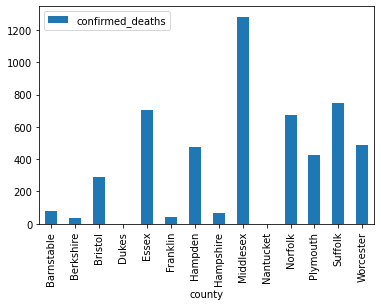

In [0]:
df_ma_county.plot(x='county', y='confirmed_deaths', kind='bar')

In [0]:
 ## run this if you want to export data in csv file
# df_nyt_ma.to_csv('df_nyt_ma.csv') 
# files.download('df_nyt_ma.csv')


* Other Data

##### Dataset: covid19_ecdc.covid_19_geographic_distribution_worldwide 


In [0]:
df_ecdc_usa = run_query('''
SELECT  date, month, year, daily_confirmed_cases, daily_deaths, confirmed_cases, deaths, countries_and_territories, geo_id, pop_data_2018 FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide` WHERE geo_id ='US' LIMIT 1000 ''')
df_ecdc_usa.head()

,date,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,pop_data_2018
0,2019-12-31,12,2019,0,0,0,0,United_States_of_America,US,327167434
1,2020-01-01,1,2020,0,0,0,0,United_States_of_America,US,327167434
2,2020-01-02,1,2020,0,0,0,0,United_States_of_America,US,327167434
3,2020-01-03,1,2020,0,0,0,0,United_States_of_America,US,327167434
4,2020-01-04,1,2020,0,0,0,0,United_States_of_America,US,327167434


In [0]:
df_ecdc_usa.size

10000

In [0]:
sort_df = df_ecdc_usa.groupby(['countries_and_territories'], as_index=False)['deaths'].sum()
# df_new = sort_df[(sort_df['deaths'] != 0) & (sort_df['deaths'] > 1000)]
sort_df.sort_values('deaths', ascending=False)

,countries_and_territories,deaths
0,United_States_of_America,1956305



ICU Bed Plots
---



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/ICU_beds_2018_2019.csv') 

fip_codes_df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/county_fips.csv', encoding = "ISO-8859-1")

fip_codes_df['county_name'] = fip_codes_df['county_name'].apply(lambda x: x.replace(' County', ''))

fip_codes = fip_codes_df.set_index('county_name')['fips'].to_dict()

df['county_fips_code'] = df['County'].apply(lambda x: fip_codes.get(x))

df_county = df[pd.notnull(df['county_fips_code'])]

icu_by_state = df.groupby('State')[['ICU Beds']].sum()

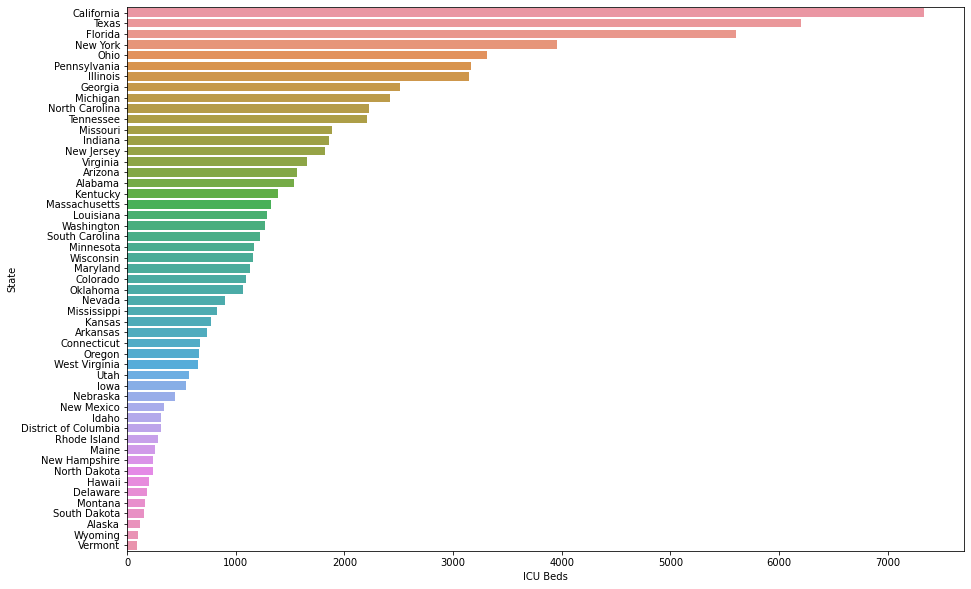

In [0]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(x='ICU Beds', y='State', data=icu_by_state.reset_index().sort_values(by=['ICU Beds'], ascending=False))

plt.show(	)

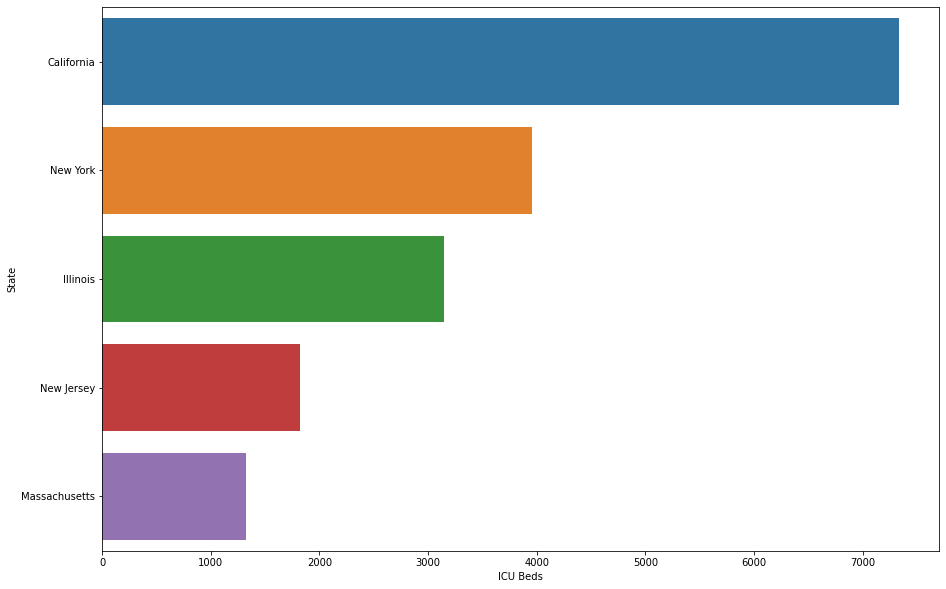

In [0]:
df = (icu_by_state.reset_index().sort_values(by=['ICU Beds'], ascending=False))

df = df[(df['State'] == 'California') | (df['State'] == 'Illinois') | (df['State'] == 'New Jersey') | (df['State'] == 'New York') | (df['State'] == 'Massachusetts')]

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ICU Beds', y='State', data=df)

plt.show()


Country / County Lockdown Dates
---

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/countryLockdowndates.csv', parse_dates=['Date'])
df[(df['Province'] == 'California') | (df['Province'] == 'Illinois') | (df['Province'] == 'New Jersey') | (df['Province'] == 'New York') | (df['Province'] == 'Massachusetts')]

,Country/Region,Province,Date,Type,Reference
250,US,California,2020-03-19,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
260,US,Illinois,2020-03-21,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
268,US,Massachusetts,2020-03-24,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
277,US,New Jersey,2020-03-21,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
279,US,New York,2020-03-22,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
